# Predicting Used Car Sale Prices

---

## 1. Project Overview
### 1.1 Objective:

<p>- The primary goal of this forecasting problem is to predict future car sales prices in the USA using machine learning regression analysis. </p>
<p>- Analyzing historical sales data on the basis of car features, we aim to develop a model that can accurately estimate car prices. </p>

### 1,2 Purposes of Sales Prediction:

<p>- Predict future sales performance to understand potential revenue. </p>
<p>- Enables better decision-making, resource allocation, and strategic planning.</p>
<p>- Informed decisions on launching new products, entering new markets, and hiring staff. </p>
<p>- Inventory Management: Predict demand to maintain adequate inventory levels. (e.g: during Sep-Dec, there is a high demand of customers in buying Toyota )</p> 
<p>- Marketing: Plan marketing efforts and budget based on sales predictions.</p>
<p>- Evaluate performance by comparing forecasted sales with actual results in order to adjust strategies and tactics to align more closely with market realities.</p>

### 1.3 A Brief On Improving Prediction Performance & Evaluation Criteria

<p>- To achieve reliable and robust prediction performance, ensuring the dataset is clean and well-prepared is significant. Data cleaning involves handling missing values, removing outliers, and normalizing data. Missing values can bias predictions, so techniques like imputation that handle missing data are essential. Outliers, which can skew results and affect model accuracy, need to be identified and removed. Data normalization, scaling features to a consistent range, is also crucial as it improves the model’s performance and convergence. </p>

<p>- Feature engineering is another critical aspect that significantly influences prediction performance. This includes feature selection, where the most relevant features are chosen to enhance model performance and reduce overfitting. Techniques such as correlation analysis, mutual information are used for this purpose. Additionally, feature transformation involves creating new features from existing data to better capture underlying patterns, such as polynomial features or interaction terms. Encoding categorical variables into numerical formats using methods like one-hot encoding or ordinal encoding is also necessary for machine learning algorithms to process the data effectively. </p>

<p>- Finally, hyperparameter tuning is essential for optimizing the model’s performance. GridSearchCV systematically explores a range of hyperparameter values to find the optimal combination, fine-tuning the model to improve its predictive capabilities. Evaluating the model using Mean Absolute Percentage Error (MAPE) ensures accurate and reliable performance metrics. </p>

---
## 2. Dataset Overview

In [1]:
import pandas as pd
import numpy as np
seed_number = 42
np.random.seed(seed_number)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head(3)

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,2HGFC2F60LH543004,37.4 in,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,...,0.0,4.666667,"138 lb-ft @ 4,200 RPM",CVT,Continuously Variable Transmission,FWD,106.3 in,70.8 in,2020,21605.0
1,3VW2B7AJ7HM347446,38.1 in,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,...,148.0,4.250000,"184 lb-ft @ 1,600 RPM",A,Automatic,FWD,104.4 in,70 in,2017,11991.0
2,WBAJA5C36HG897684,36.5 in,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,...,617.0,4.416667,"258 lb-ft @ 1,500 RPM",A,Automatic,RWD,117.1 in,83.7 in,2017,31974.0


Given a data description file, categorize all the variables (columns) into numerical and categorical (ordinal and nominal).

- Note that nominal variables contain values listed as categories, but they do not have an inherent order.

- On the other hand, ordinal variables have an inherent order; however, this order is subjective and not based on precise measurement. For example, an ordinal variable may contain values such as primary school, secondary school, high school, and university.

In [2]:
import pandas as pd
from tabulate import tabulate

data = {
    "Variable Kind": ["Numeric", "Nominal", "Ordinal"],
    "Number of Features": ["24", "15", "0"],
    "Feature Names": [
        "back_legroom, city_fuel_economy , daysonmarket, dealer_zip, engine_displacement, front_legroom, fuel_tank_volume, highway_fuel_economy, \nhorsepower, height, latitude, longitude, maximum_seating, length, wheelbase, width, mileage, power, torque, savings_amount, price, year, \nseller_rating, listed_date",
        "vin, city, exterior_color, franchise_dealer, fuel_type, interior_color, is_new, listing_color, make_name, model_name, transmission, \ntransmission_display, wheel_system, body_type, engine_type",
        "N/A"
    ]
}

df = pd.DataFrame(data)

# Print the table using tabulate
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))

| Variable Kind   |   Number of Features | Feature Names                                                                                                                             |
|:----------------|---------------------:|:------------------------------------------------------------------------------------------------------------------------------------------|
| Numeric         |                   24 | back_legroom, city_fuel_economy , daysonmarket, dealer_zip, engine_displacement, front_legroom, fuel_tank_volume, highway_fuel_economy,   |
|                 |                      | horsepower, height, latitude, longitude, maximum_seating, length, wheelbase, width, mileage, power, torque, savings_amount, price, year,  |
|                 |                      | seller_rating, listed_date                                                                                                                |
| Nominal         |                   15 | vin, city, exterior_color, franchise_deale

In the next step, identify all the columns that exist missing values without discussing how to handle them at this stage. 

Since there are 39 columns, and it is impossible to display all the columns that do and do not have missing values. 

Therefore, my strategy is to extract columns with missing values in train and test dataset, extract them into a list, then print the number of missing values associated with each column

In [3]:
# Select columns with missing values in train dataset
columns_with_missing_train = train.columns[train.isnull().any()].tolist()
train_with_missing_values = train[columns_with_missing_train]
print("Training Dataset")
for column in train_with_missing_values.columns:
    print(f"The number of missing values in {column} is {train_with_missing_values[column].isna().sum()}")

Training Dataset
The number of missing values in back_legroom is 3
The number of missing values in exterior_color is 110
The number of missing values in franchise_dealer is 84
The number of missing values in front_legroom is 3
The number of missing values in fuel_tank_volume is 3
The number of missing values in height is 3
The number of missing values in interior_color is 805
The number of missing values in latitude is 134
The number of missing values in length is 3
The number of missing values in maximum_seating is 3
The number of missing values in mileage is 282
The number of missing values in power is 8
The number of missing values in savings_amount is 108
The number of missing values in seller_rating is 100
The number of missing values in transmission is 75
The number of missing values in transmission_display is 75
The number of missing values in wheel_system is 2
The number of missing values in wheelbase is 3
The number of missing values in width is 3


In [4]:
# Select columns with missing values in test dataset
columns_with_missing_test = test.columns[test.isnull().any()].tolist()
test_with_missing_values = test[columns_with_missing_test]
print("Test Dataset")
for column in test_with_missing_values.columns:
    print(f"The number of missing values in {column} is {test_with_missing_values[column].isna().sum()}")

Test Dataset
The number of missing values in back_legroom is 25
The number of missing values in city_fuel_economy is 349
The number of missing values in engine_displacement is 27
The number of missing values in engine_type is 59
The number of missing values in exterior_color is 45
The number of missing values in franchise_dealer is 39
The number of missing values in front_legroom is 25
The number of missing values in fuel_tank_volume is 25
The number of missing values in fuel_type is 45
The number of missing values in height is 25
The number of missing values in highway_fuel_economy is 349
The number of missing values in horsepower is 27
The number of missing values in interior_color is 379
The number of missing values in latitude is 41
The number of missing values in length is 25
The number of missing values in maximum_seating is 25
The number of missing values in mileage is 149
The number of missing values in power is 325
The number of missing values in savings_amount is 42
The numbe

As we identify the type of variables earlier, now we identify if the columns are correctly or incorrectly formatted. 

For example, a numerical variable (column) should contain values in type of integer, or float. Otherwise, it should have been formatted incorrectly, and might be cleaned later.

In [5]:
# Define numerical and categorical columns
numerical_columns = [
    "back_legroom", "city_fuel_economy", "daysonmarket", "dealer_zip", "engine_displacement", 
    "front_legroom", "fuel_tank_volume", "highway_fuel_economy", "horsepower", "height", 
    "latitude", "longitude", "maximum_seating", "length", "wheelbase", "width", 
    "mileage", "power", "torque", "savings_amount", "seller_rating", "listed_date", "price", "year"
]

categorical_columns = [
    "vin", "city", "exterior_color", "franchise_dealer", "fuel_type", "interior_color", "is_new", 
    "listing_color", "make_name", "model_name", "transmission", "transmission_display", 
    "wheel_system", "body_type", "engine_type"
]

# Check for correctly and incorrectly formatted columns
correctly_formatted_numerical = []
incorrectly_formatted_numerical = []

correctly_formatted_categorical = []
incorrectly_formatted_categorical = []

for column in numerical_columns:
    if column in train.columns:
        if pd.api.types.is_numeric_dtype(train[column]):
            correctly_formatted_numerical.append(column)
        else:
            incorrectly_formatted_numerical.append(column)

for column in categorical_columns:
    if column in train.columns:
        if pd.api.types.is_object_dtype(train[column]):
            correctly_formatted_categorical.append(column)
        else:
            incorrectly_formatted_categorical.append(column)

# Output results
print("The numerical columns' data type is correctly formatted:", correctly_formatted_numerical)
print("The categorical columns' data type is correctly formatted:", correctly_formatted_categorical)
print("---------------")
print("The numerical columns' data type is incorrectly formatted:", incorrectly_formatted_numerical)
print("The categorical columns' data type is incorrectly formatted:", incorrectly_formatted_categorical)

The numerical columns' data type is correctly formatted: ['city_fuel_economy', 'daysonmarket', 'dealer_zip', 'engine_displacement', 'highway_fuel_economy', 'horsepower', 'latitude', 'longitude', 'mileage', 'savings_amount', 'seller_rating', 'price', 'year']
The categorical columns' data type is correctly formatted: ['vin', 'city', 'exterior_color', 'franchise_dealer', 'fuel_type', 'interior_color', 'listing_color', 'make_name', 'model_name', 'transmission', 'transmission_display', 'wheel_system', 'body_type', 'engine_type']
---------------
The numerical columns' data type is incorrectly formatted: ['back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 'length', 'wheelbase', 'width', 'power', 'torque', 'listed_date']
The categorical columns' data type is incorrectly formatted: ['is_new']


In the next stage, extract the columns incorrectly formatted to further examination.

In [6]:
incorrectly_formatted_numerical = [
    'back_legroom', 'front_legroom', 'fuel_tank_volume', 'height', 'maximum_seating', 
    'length', 'wheelbase', 'width', 'power', 'torque', 'listed_date'
]

incorrectly_formatted_categorical = ['is_new']
incorrectly_formatted_columns = incorrectly_formatted_numerical + incorrectly_formatted_categorical
incorrectly_formatted_columns_df = train[incorrectly_formatted_columns]

incorrectly_formatted_columns_df.head(3)

,back_legroom,front_legroom,fuel_tank_volume,height,maximum_seating,length,wheelbase,width,power,torque,listed_date,is_new
0,37.4 in,42.3 in,12.4 gal,55.7 in,5 seats,182.7 in,106.3 in,70.8 in,"158 hp @ 6,500 RPM","138 lb-ft @ 4,200 RPM",2020-03-07,True
1,38.1 in,41.2 in,14.5 gal,57.2 in,5 seats,183.3 in,104.4 in,70 in,"150 hp @ 5,000 RPM","184 lb-ft @ 1,600 RPM",2020-08-30,False
2,36.5 in,41.4 in,18 gal,58.2 in,5 seats,194.6 in,117.1 in,83.7 in,"248 hp @ 5,200 RPM","258 lb-ft @ 1,500 RPM",2020-09-02,False


**Comment:**

- `listed_date, is_new` seem to be alright. 
    - `listed_date` might be extracted to capture the information of day, month, amd year so that it can be in the right format. 
    - `is_new` is later converted to dummy variables, so it should not be a concern.

- Other columns have significant issues. They are indeed numerical columns; nonetheless, they exist in object format since each observation includes their measurement units. Hence, the cleaning process should remove those units to make the dataset consistent, and clean.

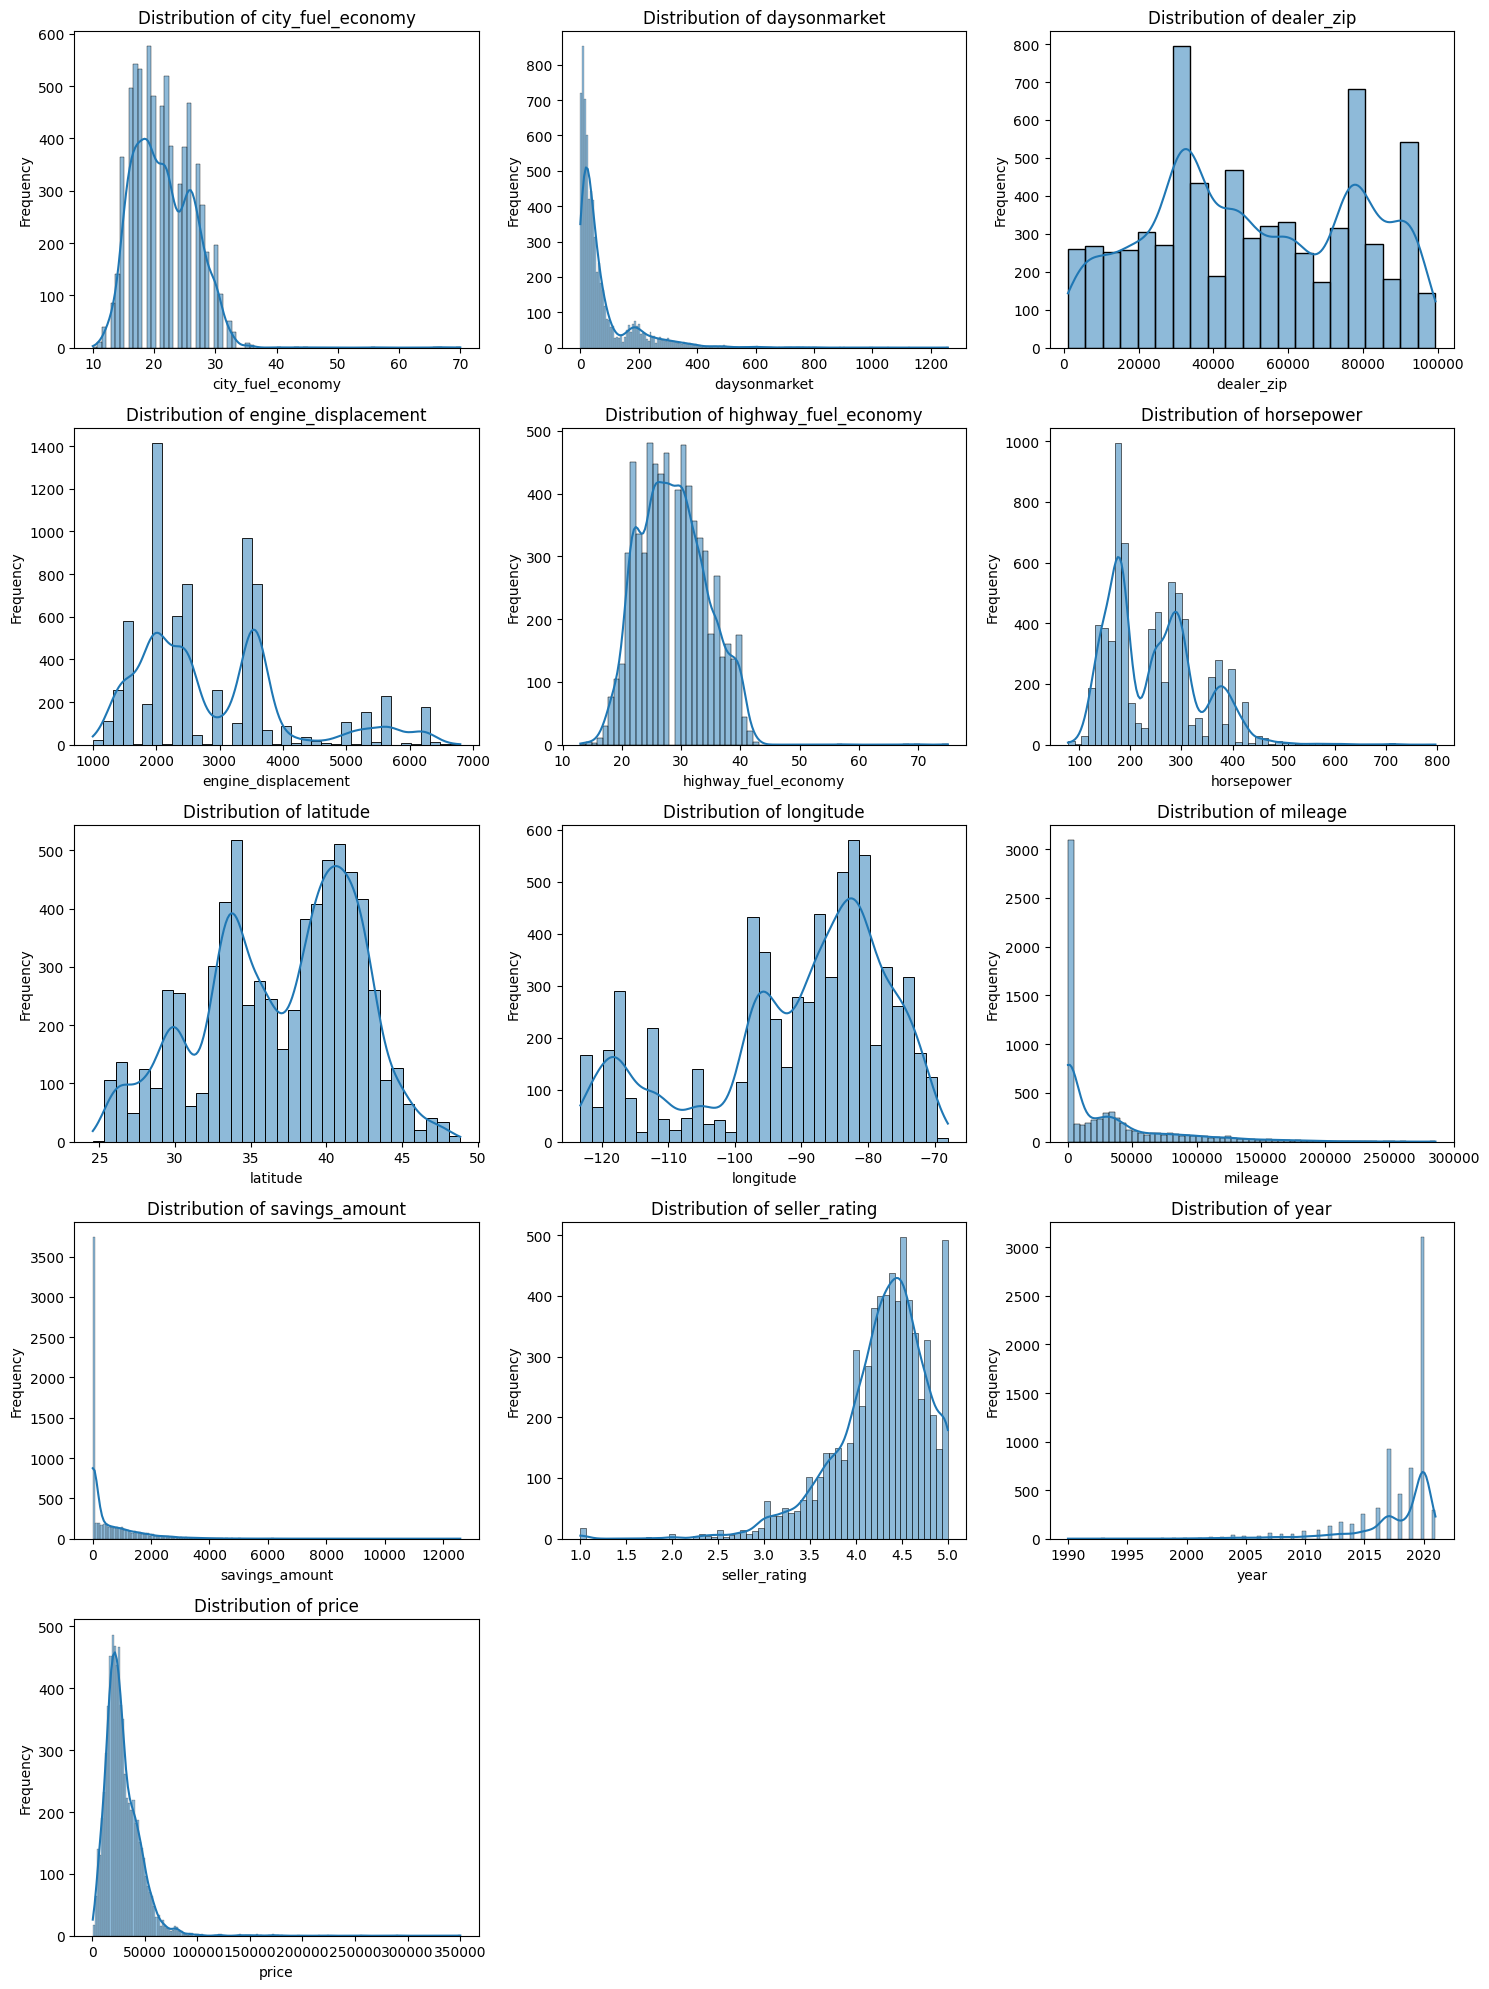

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed
num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Adjust the size of the whole frame by changing the figsize parameter
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot each numeric feature
for idx, feature in enumerate(numeric_features):
    sns.histplot(train[feature], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


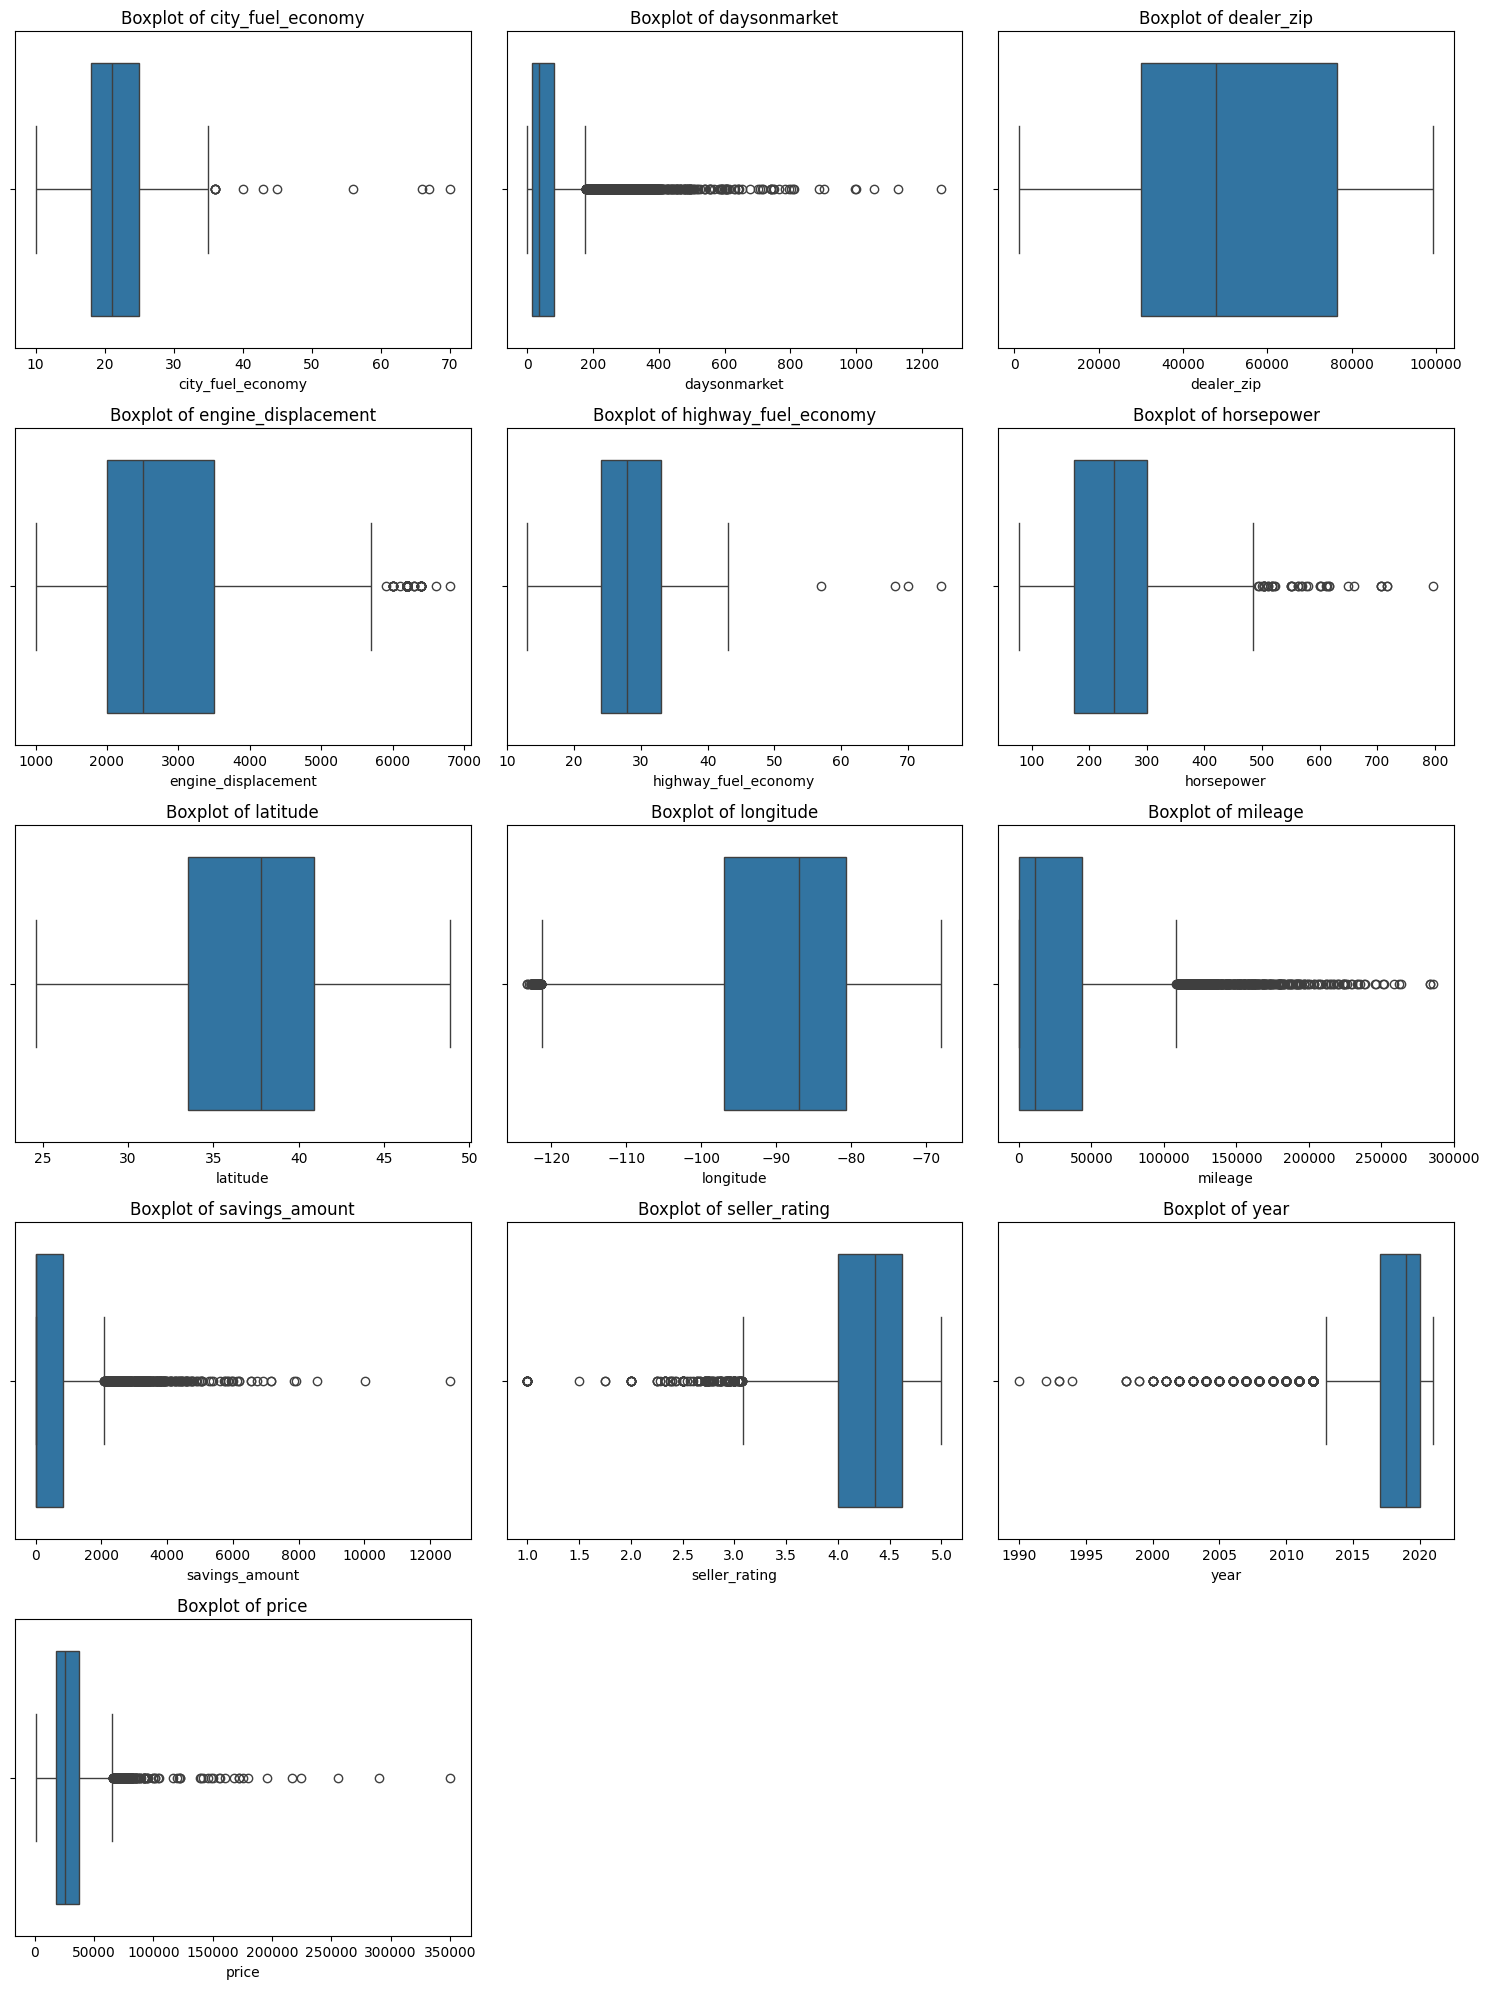

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric features
numeric_features = train.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed
num_features = len(numeric_features)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Adjust the size of the whole frame by changing the figsize parameter
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot each numeric feature
for idx, feature in enumerate(numeric_features):
    sns.boxplot(x=train[feature], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('')

# Remove any empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Evaluation: 

- The boxplots and histplot provide a visual summary of the data distributions, highlighting the presence of outliers and the spread of the data. 

- Features like `daysonmarket, mileage, savings_amount` show significant right-skewness and numerous outliers, indicating the need for careful handling during modeling to avoid biased predictions. 

- Other features such as `engine_displacement, horsepower, latitude, and longitude` show more multimodal distributions but still contain outliers that suggest the presence of distinct subgroups within the data.

---
## 3. Data Cleaning, Missing Observations and Feature Engineering

### 3.1 Clean all numerical features
#### 3.1 Part A: Clean numerical features that are incorrectly formatted

In [9]:
def extract_numeric_features(df, columns):
    for column in columns:
        df[column] = df[column].str.extract(r'(\d+\.?\d*)').astype("float64")
    return df


columns_to_extract = ["back_legroom", "front_legroom","wheelbase", "width", "height", "length", "fuel_tank_volume", "maximum_seating"]

# Apply function
train_clean = extract_numeric_features(train, columns_to_extract)
test_clean = extract_numeric_features(test, columns_to_extract)

- In the dataset, several numerical features exhibited a format that included both numerical values and accompanying text. These features were as follows: `back_legroom`, `front_legroom`, `wheelbase`, `width`, `height`, `length`, `maximum_seating`

- These numerical columns are displayed as categorical. In order for later analysis, text extraction for length measurements is executed. Their measurement units (e.g: inches, seating..) are removed. Only the numerical value is retained. For instance, 5 seating in column `maximum seating ` after the process would be transformed into 5. 

#### 3.1 Part B: Extract multiple-information columns and creating new columns

In [10]:
import re

## ===========================================================
# Function to extract maximum torque and torque RPM
def extract_torque_info(torque_str):
    if pd.isna(torque_str):
        return pd.Series([np.nan, np.nan])
    
    # Regular expression to extract torque and RPM
    match = re.match(r"(\d+) lb-ft @ ([\d,]+) RPM", torque_str)
    if match:
        torque = int(match.group(1))
        rpm = int(match.group(2).replace(',', ''))
        return pd.Series([torque, rpm])
    else:
        return pd.Series([np.nan, np.nan])

# Apply the function to the 'torque' column
## =====
## Train
train_clean[['max_torque', 'torque_rpm']] = train_clean['torque'].apply(extract_torque_info)
train_clean.drop(columns = {"torque"},inplace = True)

## Test
test_clean[['max_torque', 'torque_rpm']] = test_clean['torque'].apply(extract_torque_info)
test_clean.drop(columns = {"torque"},inplace = True)


## ===========================================================
# Function to extract maximum power and power RPM
def extract_power_info(power_str):
    if pd.isna(power_str):
        return pd.Series([np.nan, np.nan])
    
    # Regular expression to extract power and RPM
    match = re.match(r"(\d+) hp @ ([\d,]+) RPM", power_str)
    if match:
        power = int(match.group(1))
        rpm = int(match.group(2).replace(',', ''))
        return pd.Series([power, rpm])
    else:
        return pd.Series([np.nan, np.nan])
    
# Apply the function to the 'power' column
## =====
## Train
train_clean[['max_power', 'power_rpm']] = train_clean['power'].apply(extract_power_info)
train_clean.drop(columns = {"power"},inplace = True)

## Test
test_clean[['max_power', 'power_rpm']] = test_clean['power'].apply(extract_power_info)
test_clean.drop(columns = {"power"},inplace = True)


## ===========================================================
# Convert to datetime, errors='coerce' will handle any invalid date format
train_clean['listed_date'] = pd.to_datetime(train_clean['listed_date'], errors='coerce')

# Extract day, month, year into separate columns
train_clean['listed_date_day'] = train_clean['listed_date'].dt.day
train_clean['listed_date_month'] = train_clean['listed_date'].dt.month
train_clean['listed_date_year'] = train_clean['listed_date'].dt.year

train_clean.drop(columns = {"listed_date"},inplace = True)

## Test
# Convert to datetime, errors='coerce' will handle any invalid date format
test_clean['listed_date'] = pd.to_datetime(test_clean['listed_date'], errors='coerce')

# Extract day, month, year into separate columns
test_clean['listed_date_day'] = test_clean['listed_date'].dt.day
test_clean['listed_date_month'] = test_clean['listed_date'].dt.month
test_clean['listed_date_year'] = test_clean['listed_date'].dt.year
test_clean.drop(columns = {"listed_date"},inplace = True)

# ============================================================

# Train
train_clean['miles_per_gallon'] = np.where(
    pd.isna(train_clean['mileage']) | pd.isna(train_clean['fuel_tank_volume']),
    np.nan,
    train_clean['mileage'] / train_clean['fuel_tank_volume']
)


# Test
test_clean['miles_per_gallon'] = np.where(
    pd.isna(test_clean['mileage']) | pd.isna(test_clean['fuel_tank_volume']),
    np.nan,
    test_clean['mileage'] / test_clean['fuel_tank_volume']
)

C:\Users\HA VINH NGUYEN\AppData\Local\Temp\ipykernel_6584\2168809941.py:68: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test_clean['listed_date'] = pd.to_datetime(test_clean['listed_date'], errors='coerce')


**Splitting 'Power' column:** 

- The `Power` column has values in a format like "170 hp @ 6,000 RPM." To extract the relevant details, the column was split into two new features `power_rpm` (which is "6000") and `max_power` (which is '170'). This separation allowed for the independent analysis of these pieces of information, which may help in prediction of prices.

**Splitting 'Torque' column:** 

- Similarly, the `Torque` column was also split into `torque_rpm` and `max_torque`.

**Extract and separate 'listed_date':** 

- The 'listed_date' column was transformed into three separate columns `listed_date_day`, `listed_date_month`, and `listed_date_year`. This separation enabled a more detailed exploration of date-related information.

**New column 'miles_per_gallon':** 

- The new column `miles_per_gallon` is calculated as the division between `mileage` and `fuel_per_gallon`. We notice that price of a car may differentiate on how much fuel a car consume, so adding this variable may help to predict price.

#### 3.1 Part C: Handle Missing Values

In [11]:
numeric_col = ["back_legroom", "front_legroom","wheelbase", "width", "height", "length", "fuel_tank_volume", 'max_power', 'power_rpm', 'max_torque', "torque_rpm",
               "listed_date_day", 'listed_date_month', 'listed_date_year', "year", 'daysonmarket', "dealer_zip", "savings_amount", "seller_rating", "city_fuel_economy", "highway_fuel_economy",
               "engine_displacement", "horsepower", "latitude", "longitude", "mileage", "miles_per_gallon"]

column_to_impute_mode = ['maximum_seating']

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Train 
means = train_clean[numeric_col].mean()

for col in numeric_col:
    mean_val = means[col] 
    train_clean[col].fillna(mean_val, inplace=True) 

# Test
means = test_clean[numeric_col].mean()

for col in numeric_col:
    mean_val = means[col] 
    test_clean[col].fillna(mean_val, inplace=True) 

train_clean[column_to_impute_mode] = train_clean[column_to_impute_mode].fillna(train_clean[column_to_impute_mode].mode().iloc[0])
test_clean[column_to_impute_mode] = test_clean[column_to_impute_mode].fillna(test_clean[column_to_impute_mode].mode().iloc[0])


numeric_col = ["back_legroom", "front_legroom","wheelbase", "width", "height", "length", "fuel_tank_volume", "maximum_seating", 'max_power', 'power_rpm', 'max_torque', "torque_rpm",
               "listed_date_day", 'listed_date_month', 'listed_date_year', "year", 'daysonmarket', "dealer_zip", "savings_amount", "seller_rating", "city_fuel_economy", "highway_fuel_economy",
               "engine_displacement", "horsepower", "latitude", "longitude", "mileage", "miles_per_gallon"] 

train_clean[numeric_col] = train_clean[numeric_col].astype("float64")
test_clean[numeric_col] = test_clean[numeric_col].astype("float64")

**Identifying Numerical Columns with Missing Values:** 

- Firstly identify all numerical columns in train and test datasets. It is not important to identify which columns have and do not have missing values as we use a defined function to traverse through the list of columns and impute missing values if there are.

**Imputing Missing Values for Discrete Columns:** 

- 'maximum_seating' consisted of discrete values, we opted to impute the missing values with the mode. 

- The mode represents the most frequently occurring value within the column. This approach helped maintain the consistency of the categorical data.

**Imputing Missing Values for Continuous Columns:** 

- Missing values in the remaining columns, which represent continuous numerical data, were replaced with the mean of the respective columns.

- The mean is calculated as the average of the existing data points in the column. This imputation method ensures that the filled values are consistent with the overall distribution of the existing data.

### 3.2 Encode all categorical variables:

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, map colours into 5 basic colours + 'other': [red, yellow, green, blue, purple, other] and then encode.

In [13]:
vin_train = train_clean["vin"]
vin_test = test_clean["vin"]
train_clean.drop(columns = {"vin"}, inplace = True)
test_clean.drop(columns = {"vin"}, inplace = True)

# Define the list of categorical columns
categorical_columns = [col for col in train_clean.columns if col not in numeric_col and col != 'price']

# Function to fill null values with mode
def fill_nulls_with_mode(df, columns):
    null_categorical_columns = df[columns].isna().sum()
    columns_with_nulls = null_categorical_columns[null_categorical_columns > 0].index
    modes = df[columns_with_nulls].mode().iloc[0]
    df[columns_with_nulls] = df[columns_with_nulls].fillna(modes)

# Fill null values in train dataset
fill_nulls_with_mode(train_clean, categorical_columns)

# Fill null values in test dataset
fill_nulls_with_mode(test_clean, categorical_columns)

# Calculate the top 5 values for each categorical feature in the train_data dataset
top_5_values_dict = {}
for feature in categorical_columns:
    top_5_values = train_clean[feature].value_counts().nlargest(5).index
    top_5_values_dict[feature] = top_5_values

# Map features into 5 most frequent values + other
for feature in categorical_columns:
    train_clean[feature] = train_clean[feature].where(train_clean[feature].isin(top_5_values_dict[feature]) | train_clean[feature].isna(), 'other')
    
# Apply the same top 5 values to the corresponding features in the test_data dataset
for feature in categorical_columns:
    test_clean[feature] = test_clean[feature].where(test_clean[feature].isin(top_5_values_dict[feature]) | test_clean[feature].isna(), 'other')

In [14]:
#----------------Training data----------------
dummy_variables = pd.get_dummies(train_clean[categorical_columns], drop_first=True)
train_clean = pd.concat([train_clean, dummy_variables], axis=1)
# Drop the original categorical features
train_clean.drop(categorical_columns, axis=1, inplace=True)

#----------------Test data----------------
dummy_variables = pd.get_dummies(test_clean[categorical_columns], drop_first=True)
test_clean = pd.concat([test_clean, dummy_variables], axis=1)
# Drop the original categorical features
test_clean.drop(categorical_columns, axis=1, inplace=True)

# Drop unnecessary columns and rename as required
train_clean.rename(columns={"franchise_dealer_True": "franchise_dealer", "is_new_True": "is_new"}, inplace=True)
test_clean.rename(columns={"franchise_dealer_True": "franchise_dealer", "is_new_True": "is_new"}, inplace=True)

# Convert categorical columns to int64
categorical_columns = [col for col in train_clean.columns if col not in numeric_col and col != 'price']
train_clean[categorical_columns] = train_clean[categorical_columns].astype("int64")

categorical_columns = [col for col in test_clean.columns if col not in numeric_col and col != 'price']
test_clean[categorical_columns] = test_clean[categorical_columns].astype("int64")

**Map to Top 5 + Other:** 

- Initially, we calculated the top 5 values for each categorical feature in the `train_clean` dataframe. This process provided insight into the most frequent categories within each feature.

- After determining the top 5 values for each feature, we mapped the categorical features into the 5 most frequent values, alongside an additional category labeled 'other.' This mapping simplified and standardized the categorical data, making it more manageable and consistent.

**Consistency between Train and Test Datasets:** 

- To ensure consistency between the train and test dataframe, we applied the same top 5 values obtained from the `train_clean` dataset to the corresponding features in the `test_clean` dataframe.

**One-Hot Encoding:** 

- This transformation converted the categorical variables into binary columns. 

- For example (not related to this dataset), one-hot encodes `Gender` into 2 new columns Male and Female. Male column has values 0, and 1. `Value 0` represents False, this observation is not Male, and `Value 1` represents True, this observation is Male. 


### 3.3 Exploratory Data Analysis (EDA)

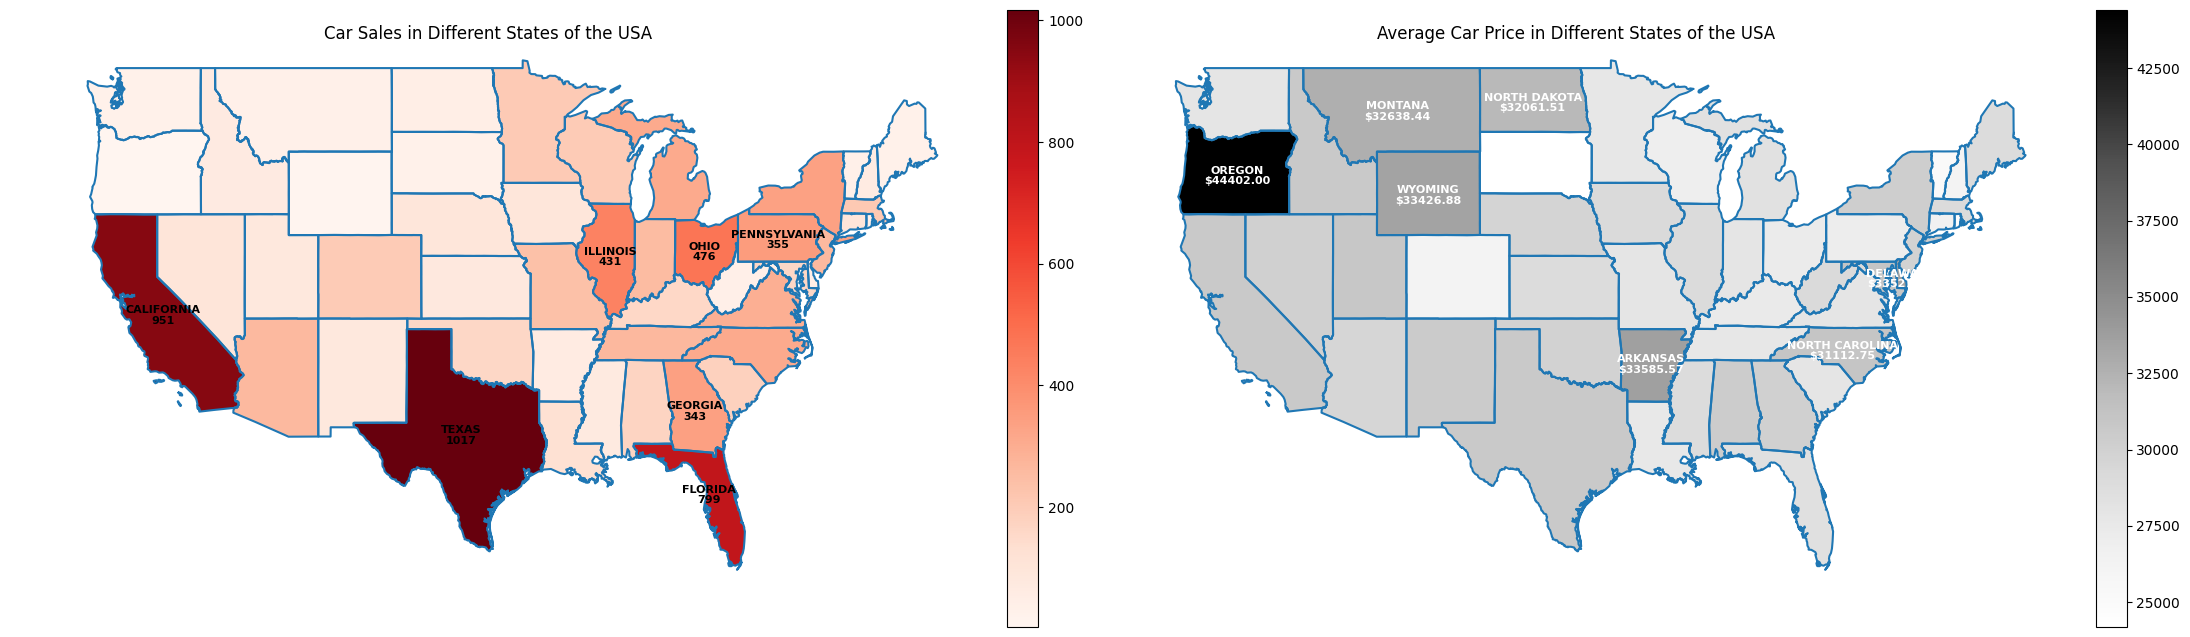

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the detailed shapefile for US states
shapefile_path = 'States_shapefile/States_shapefile.shp'

# Load the detailed US states shapefile
states = gpd.read_file(shapefile_path)

# Exclude Alaska and Hawaii
states = states[~states['State_Name'].isin(['Alaska', 'Hawaii'])]

# Combine the datasets
combined_df = pd.concat([train, test], ignore_index=True)

# Create a GeoDataFrame from the combined dataset
gdf_points = gpd.GeoDataFrame(combined_df, geometry=gpd.points_from_xy(combined_df.longitude, combined_df.latitude), crs="EPSG:4326")

# Perform spatial join to map points to states
gdf_points = gpd.sjoin(gdf_points, states, how="inner", predicate="intersects")

# Aggregate car sales and average price by state using the 'State_Code' column
state_sales = gdf_points.groupby('State_Code').size().reset_index(name='car_sales')
state_avg_price = gdf_points.groupby('State_Code')['price'].mean().reset_index(name='avg_price')

# Merge the aggregated data with the states GeoDataFrame
states = states.merge(state_sales, how='left', left_on='State_Code', right_on='State_Code')
states = states.merge(state_avg_price, how='left', left_on='State_Code', right_on='State_Code')

# Plot the maps
fig, axes = plt.subplots(1, 2, figsize=(22, 11))

# Plot total car sales
states.boundary.plot(ax=axes[0])
states.plot(column='car_sales', ax=axes[0], legend=False, cmap='Reds', missing_kwds={"color": "lightgrey"})
axes[0].set_xlim([-130, -65])
axes[0].set_ylim([24, 50])
axes[0].set_axis_off()
axes[0].set_title('Car Sales in Different States of the USA')

# Show labels only for the top 7 states with the most car sales
top_7_sales_states = states.nlargest(7, 'car_sales')
for idx, row in top_7_sales_states.iterrows():
    xy = row['geometry'].centroid.coords[0]
    axes[0].annotate(text=row['State_Name'], xy=xy, ha='center', fontsize=8, color='black', weight='bold')
    axes[0].annotate(text=f"{int(row['car_sales'])}", xy=(xy[0], xy[1] - 0.5), ha='center', fontsize=8, color='black', weight='bold')

# Adjust the color bar for car sales
sm_sales = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=states['car_sales'].min(), vmax=states['car_sales'].max()))
sm_sales._A = []
cbar_sales = fig.colorbar(sm_sales, ax=axes[0], fraction=0.03, pad=0.04)

# Plot average car price
states.boundary.plot(ax=axes[1])
states.plot(column='avg_price', ax=axes[1], legend=False, cmap='Greys')
axes[1].set_xlim([-130, -65])
axes[1].set_ylim([24, 50])
axes[1].set_axis_off()
axes[1].set_title('Average Car Price in Different States of the USA')

# Show labels only for the top 7 states with the highest average car price
top_7_price_states = states.nlargest(7, 'avg_price')
for idx, row in top_7_price_states.iterrows():
    xy = row['geometry'].centroid.coords[0]
    axes[1].annotate(text=row['State_Name'], xy=xy, ha='center', fontsize=8, color='white', weight='bold')
    axes[1].annotate(text=f"${row['avg_price']:.2f}", xy=(xy[0], xy[1] - 0.5), ha='center', fontsize=8, color='white', weight='bold')

# Adjust the color bar for average car price
sm_price = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=states['avg_price'].min(), vmax=states['avg_price'].max()))
sm_price._A = []
cbar_price = fig.colorbar(sm_price, ax=axes[1], fraction=0.03, pad=0.04)

plt.tight_layout()
plt.show()

**Comment:**

- Although Texas, and California are states that have most car sales all over the USA. However, these regions seem to have fairly average sales prices, less than that of Oregon, and Wyoming.
- This might come from several factors, such as the taxes differently applied in each state, also the population of each state, and how often residents at each state buy car, how active in buying cars in a state is.
- We are not gonna further discuss it, but rather than to consider some factors that might impact the price of cars in each state.


In [16]:
features = [col for col in train_clean.columns if col != "price"]
# Compute the correlation with 'price'
price_corr = train_clean[['price'] + features].corr()['price'].drop('price')

#Display the top 20 correlated features with 'price'
price_corr.abs().sort_values(ascending=False).head(20)

horsepower                0.618147
max_torque                0.602940
max_power                 0.594718
miles_per_gallon          0.506101
mileage                   0.480523
year                      0.462949
fuel_tank_volume          0.415923
width                     0.398082
wheel_system_FWD          0.392537
wheelbase                 0.385918
length                    0.382043
engine_displacement       0.378950
highway_fuel_economy      0.371216
city_fuel_economy         0.340206
engine_type_I4            0.330155
engine_type_V8            0.329618
height                    0.314290
back_legroom              0.275019
body_type_Sedan           0.238533
body_type_Pickup Truck    0.237773
Name: price, dtype: float64

**Comment:**

- A list of top 20 variables that have high correlation with price. 
- The higher the correlation is, the stronger relationship of a predictor has with price.
- Technical components of a car seems to play an important effect on the price of a car, e.g: horsepower, max_torque, max_power, and miles_per_gallon.

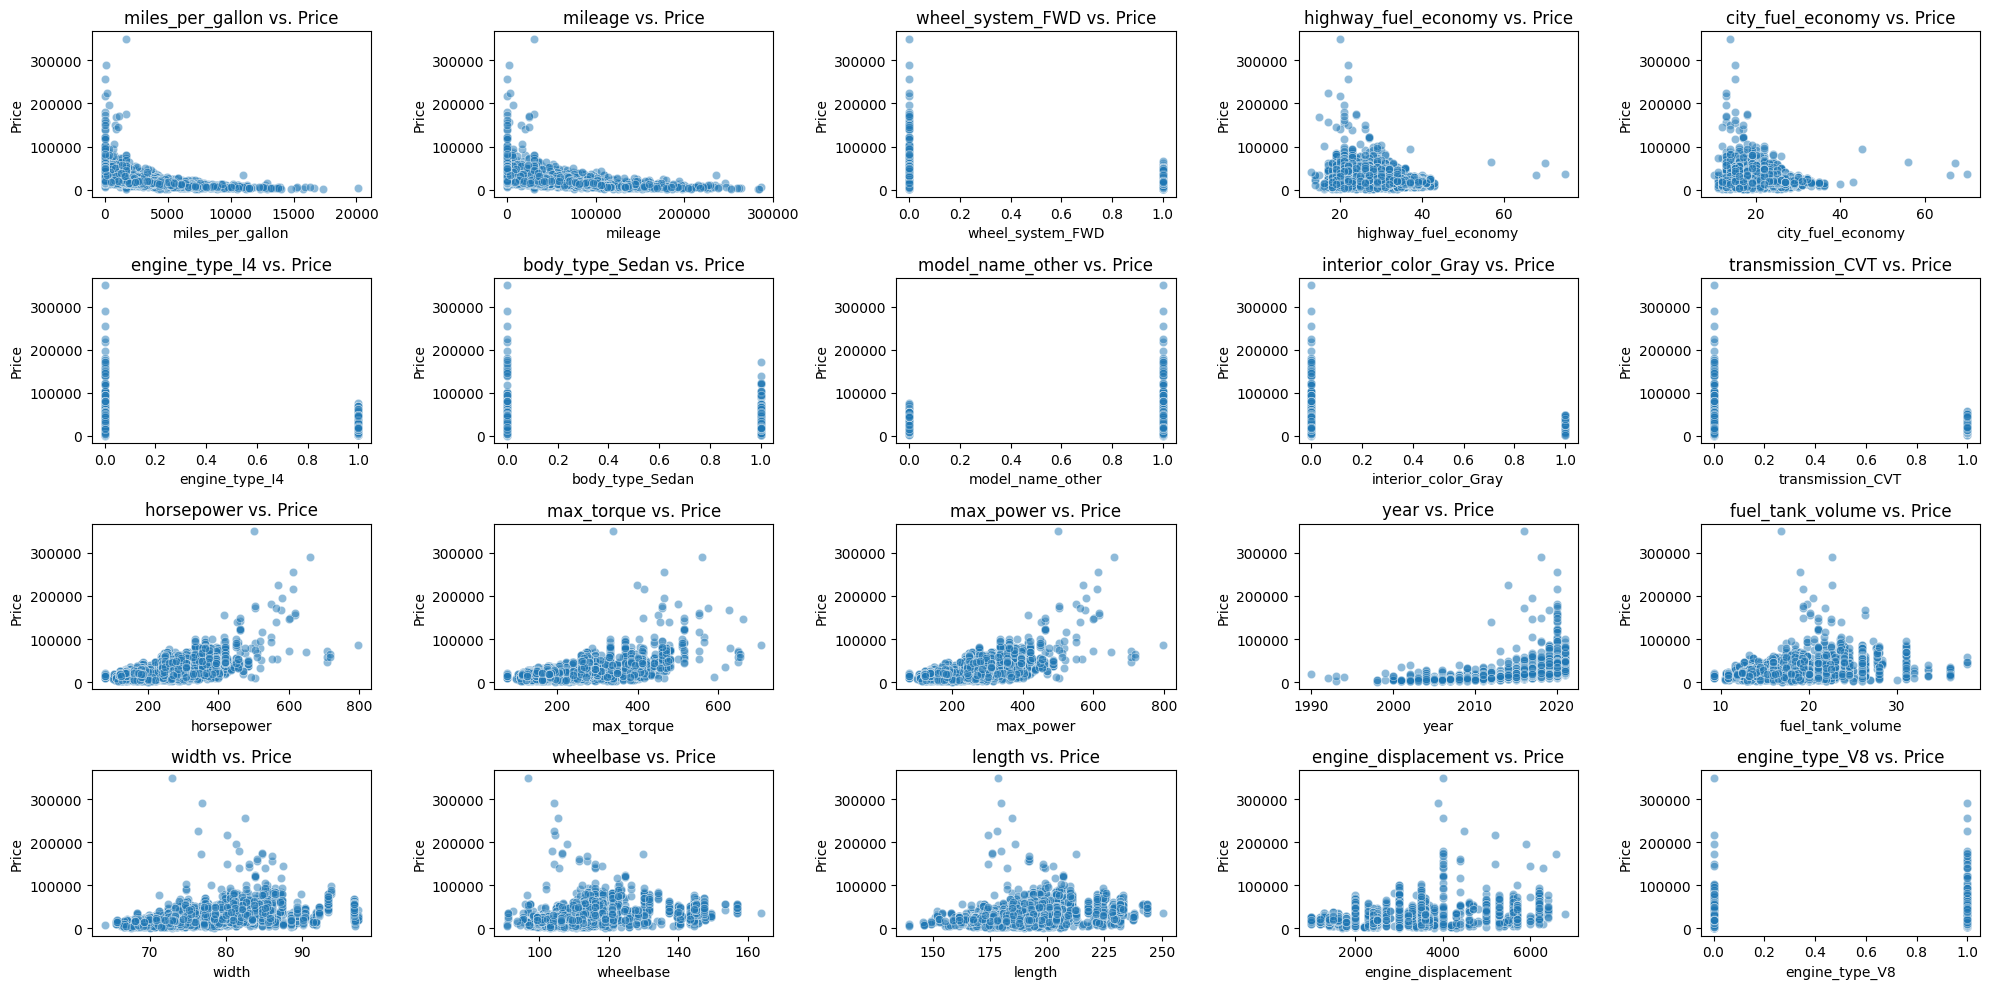

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation with 'price'
price_corr = train_clean[['price'] + features].corr()['price'].drop('price')

# Select top 10 positive and top 10 negative correlations
top_10_positive = price_corr.sort_values(ascending=False).head(10)
top_10_negative = price_corr.sort_values(ascending=True).head(10)
top_correlations = pd.concat([top_10_negative, top_10_positive])

# Create a grid of scatterplots
plt.figure(figsize=(20, 10))

# Iterate over the selected features and plot them in the grid
for idx, feature in enumerate(top_correlations.index):
    plt.subplot(4, 5, idx+1)
    sns.scatterplot(data=train_clean, x=feature, y='price', alpha=0.5)
    plt.title(f"{feature} vs. Price")
    plt.xlabel(feature)
    plt.ylabel("Price")

# Adjust the layout for better visibility
plt.tight_layout()
plt.show()

**Comment:** 
- The plots between top highest correlated variables with target price seem not to be linear. 
- There are some right-skewness in some of the top highest correlated variables (checked implicitly). 
- Log - transformation has been applied, but it does not improve model performance, and in some models, log-transformation reduces the performances. Therefore, this technique is omitted out. Instead, polynomial terms have been applied.
- Before applying polynomial terms, we first check the contribution of each variable to efficiently predict price in later building models.
- Identifying the most influential variables helps in understanding which features significantly affect the target variable. This understanding can guide feature selection and engineering processes. 

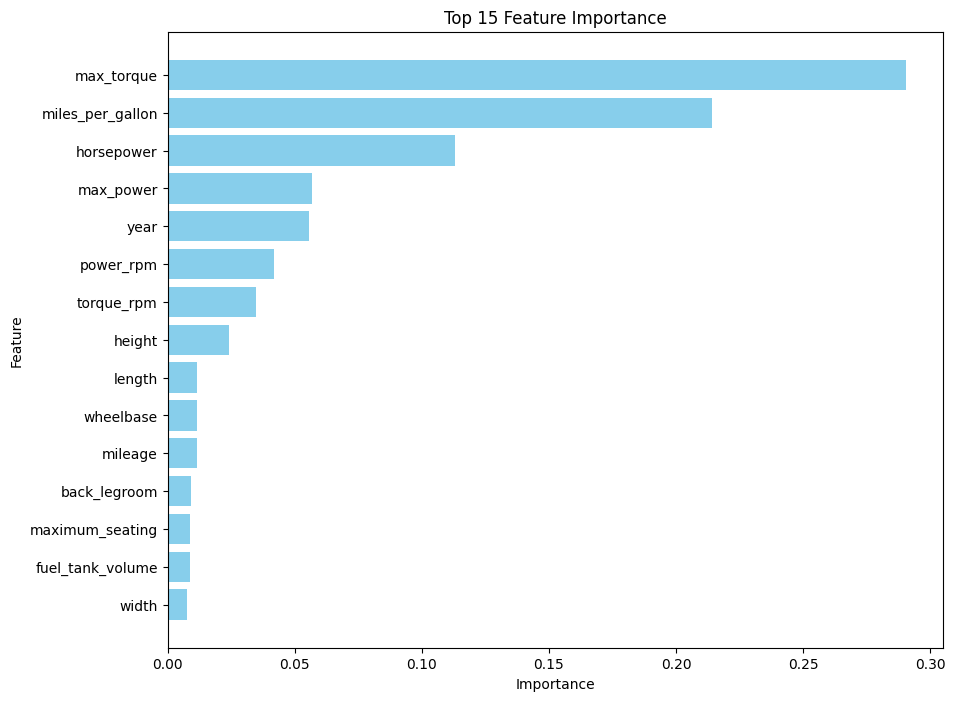

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# Splitting the training data into features and target variable
X_train = train_clean.drop(columns=['price'])
y_train = train_clean['price']

# Fitting the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# # Getting feature importance
importances = model.feature_importances_
features = X_train.columns

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**Comment:**

- There is a significant difference in terms of importance between variables.
- We would identify a threshold to remove variables that might not be useful to predict price. 
- Set a small threshold not to remove too many features because insignificant features might still have their contributions in the presence of interaction or non-linear effects.

In [19]:
threshold = 0.0005

# Identify features to remove
features_to_remove = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']
train_clean = train_clean.drop(columns=features_to_remove)
test_clean = test_clean.drop(columns=features_to_remove)

In [20]:
last_index = train_clean.columns[-1]
train_clean["max_torque_mpg"]= train_clean['max_torque'] * train_clean['miles_per_gallon']
train_clean["max_torque_horsepower"]= train_clean['max_torque'] * train_clean['horsepower']
train_clean["max_torque_max_power"]= train_clean['max_torque'] * train_clean['max_power']
train_clean["max_torque_power_rpm"]= train_clean['max_torque'] * train_clean['power_rpm']
train_clean["max_torque_year"]= train_clean['max_torque'] * train_clean['year']
train_clean["max_torque_torque_rpm"]= train_clean['max_torque'] * train_clean['torque_rpm']

train_clean["mpg_horsepower"]= train_clean['miles_per_gallon'] * train_clean['horsepower']
train_clean["mpg_max_power"]= train_clean['miles_per_gallon'] * train_clean['max_power']
train_clean["mpg_power_rpm"]= train_clean['miles_per_gallon'] * train_clean['power_rpm']
train_clean["mpg_power_year"]= train_clean['miles_per_gallon'] * train_clean['year']
train_clean["mpg_power_torque_rpm"]= train_clean['miles_per_gallon'] * train_clean['torque_rpm']

train_clean["horsepower_max_power"]= train_clean['horsepower'] * train_clean['max_power']
train_clean["horsepower_power_rpm"]= train_clean['horsepower'] * train_clean['power_rpm']
train_clean["horsepower_year"]= train_clean['horsepower'] * train_clean['year']
train_clean["horsepower_torque_rpm"]= train_clean['horsepower'] * train_clean['torque_rpm']

train_clean["max_power_power_rpm"]= train_clean['max_power'] * train_clean['power_rpm']
train_clean["max_power_year"]= train_clean['max_power'] * train_clean['year']
train_clean["max_power_torque_rpm"]= train_clean['max_power'] * train_clean['torque_rpm']

train_clean["power_rpm_year"]= train_clean['power_rpm'] * train_clean['year']
train_clean["power_rpm_torque_rpm"]= train_clean['power_rpm'] * train_clean['torque_rpm']

# ========================== Test ======================================================
test_clean["max_torque_mpg"]= test_clean['max_torque'] * test_clean['miles_per_gallon']
test_clean["max_torque_horsepower"]= test_clean['max_torque'] * test_clean['horsepower']
test_clean["max_torque_max_power"]= test_clean['max_torque'] * test_clean['max_power']
test_clean["max_torque_power_rpm"]= test_clean['max_torque'] * test_clean['power_rpm']
test_clean["max_torque_year"]= test_clean['max_torque'] * test_clean['year']
test_clean["max_torque_torque_rpm"]= test_clean['max_torque'] * test_clean['torque_rpm']

test_clean["mpg_horsepower"]= test_clean['miles_per_gallon'] * test_clean['horsepower']
test_clean["mpg_max_power"]= test_clean['miles_per_gallon'] * test_clean['max_power']
test_clean["mpg_power_rpm"]= test_clean['miles_per_gallon'] * test_clean['power_rpm']
test_clean["mpg_power_year"]= test_clean['miles_per_gallon'] * test_clean['year']
test_clean["mpg_power_torque_rpm"]= test_clean['miles_per_gallon'] * test_clean['torque_rpm']

test_clean["horsepower_max_power"]= test_clean['horsepower'] * test_clean['max_power']
test_clean["horsepower_power_rpm"]= test_clean['horsepower'] * test_clean['power_rpm']
test_clean["horsepower_year"]= test_clean['horsepower'] * test_clean['year']
test_clean["horsepower_torque_rpm"]= test_clean['horsepower'] * test_clean['torque_rpm']

test_clean["max_power_power_rpm"]= test_clean['max_power'] * test_clean['power_rpm']
test_clean["max_power_year"]= test_clean['max_power'] * test_clean['year']
test_clean["max_power_torque_rpm"]= test_clean['max_power'] * test_clean['torque_rpm']

test_clean["power_rpm_year"]= test_clean['power_rpm'] * test_clean['year']
test_clean["power_rpm_torque_rpm"]= test_clean['power_rpm'] * test_clean['torque_rpm']

### Reason for including interaction terms:

- Including interaction terms between important features in a model allows us to capture the combined effect of these features on the target variable.

**Capturing Synergistic Effects:**

- Interaction terms can reveal how the effect of one feature on the target variable depends on the value of another feature. For example, the impact of marketing spend might be different at various levels of product quality. By including interaction terms, we can model such synergistic effects.

**Enhancing Model Predictive Power:**

- Including interaction terms can improve the predictive accuracy of the model. Important features might interact in ways that significantly influence the target variable, and capturing these interactions can lead to better performance.

**Understanding Feature Relationships:**

- Interaction terms help in understanding the relationships between features. They provide insights into how features work together to affect the target variable, which can be valuable for interpretation and decision-making.

**Modeling Non-linear Relationships:**

- Interaction terms can model non-linear relationships between features and the target variable. For example, the combined effect of two features might not be simply additive but multiplicative or more complex.

**Addressing Multicollinearity:**

- In some cases, interaction terms can help mitigate multicollinearity issues by explaining the variance in the target variable that is shared among correlated features. This can lead to more stable and reliable estimates of feature effects.

### Reason for including polynomial terms

- Including polynomial terms for important variables in a model allows to capture non-linear relationships between those variables and the target variable. 

**Improving Model Fit:**

- Adding polynomial terms can help improve the fit of the model to the data. This can lead to better predictive accuracy by reducing the bias that might result from assuming a strictly linear relationship.

**Increasing Flexibility:**

- Polynomial terms increase the flexibility of the model, enabling it to learn more complex patterns in the data. This can be particularly useful when dealing with variables that have a curvilinear effect on the target variable.

**Enhanced Predictive Power:**

- By capturing more complex relationships, polynomial terms can lead to improved predictive performance. This is especially true when the underlying relationship between the predictor and the target variable is non-linear.

In [21]:
import statsmodels.api as sm
X = train_clean[['miles_per_gallon']]
y = train_clean['price']

# Generate polynomial features
poly_degree = 4  # Adjust as needed
poly_features = sm.add_constant(np.column_stack([X**i for i in range(1, poly_degree+1)]))

# Fit polynomial regression model
model = sm.OLS(y, poly_features)
results = model.fit()

# Get significance of each term
summary_table = results.summary()
summary_df = pd.read_html(summary_table.tables[1].as_html(), header=0, index_col=0)[0]
summary_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,2.420000e-02,1.000000e-03,38.042,0.0,2.300000e-02,2.500000e-02
x1,2.684610e+01,7.060000e-01,38.042,0.0,2.546300e+01,2.822900e+01
x2,-7.800000e-03,0.000000e+00,-27.094,0.0,-8.000000e-03,-7.000000e-03
x3,7.243000e-07,3.450000e-08,21.002,0.0,6.570000e-07,7.920000e-07
x4,-2.063000e-11,1.200000e-12,-17.218,0.0,-2.300000e-11,-1.830000e-11


**Comment:**

- The purpose of the above commented code is to check whether the polynomial terms is significant or not.

- For example, `miles_per_gallon` at quartic term is insignificant (P_value > 0.05), so I reduce the term down to cubic. At term cubic, P_value < 0.05, so we take terms 2 and 3 degrees of polynomial.

- However, be mindful keeping adding up the polynomial terms. Previously, when I see the P_value of a degree of polynomial < 0.05, and I add more terms. However, when building the models, overfitting happens. Therefore, I make relevant changes, to keep variables at 4 degrees of polynomial at maximum. I comment the process that I add up the terms to show my work.

In [22]:
train_clean['mpg^2'] = train_clean['miles_per_gallon'] ** 2
train_clean['mpg^3'] = train_clean['miles_per_gallon'] ** 3

train_clean['width^2'] = train_clean['width'] ** 2
train_clean['width^3'] = train_clean['width'] ** 3

train_clean['mileage^2'] = train_clean['mileage'] ** 2
train_clean['mileage^3'] = train_clean['mileage'] ** 3

train_clean['highway_fuel_economy^2'] = train_clean['highway_fuel_economy'] ** 2
train_clean['highway_fuel_economy^3'] = train_clean['highway_fuel_economy'] ** 3
train_clean['city_fuel_economy^4'] = train_clean['highway_fuel_economy'] ** 4

train_clean['city_fuel_economy^2'] = train_clean['city_fuel_economy'] ** 2
train_clean['city_fuel_economy^3'] = train_clean['city_fuel_economy'] ** 3
train_clean['city_fuel_economy^4'] = train_clean['city_fuel_economy'] ** 4

train_clean['horsepower^2'] = train_clean['horsepower'] ** 2
train_clean['horsepower^3'] = train_clean['horsepower'] ** 3
train_clean['horsepower^4'] = train_clean['horsepower'] ** 4
# train_clean['horsepower^5'] = train_clean['horsepower'] ** 5
# train_clean['horsepower^6'] = train_clean['horsepower'] ** 6
# train_clean['horsepower^7'] = train_clean['horsepower'] ** 7

train_clean['max_torque^2'] = train_clean['max_torque'] ** 2
train_clean['max_torque^3'] = train_clean['max_torque'] ** 3
train_clean['max_torque^4'] = train_clean['max_torque'] ** 4
# train_clean['max_torque^5'] = train_clean['max_torque'] ** 5
# train_clean['max_torque^6'] = train_clean['max_torque'] ** 6
# train_clean['max_torque^7'] = train_clean['max_torque'] ** 7
# train_clean['max_torque^8'] = train_clean['max_torque'] ** 8
# train_clean['max_torque^9'] = train_clean['max_torque'] ** 9
# train_clean['max_torque^10'] = train_clean['max_torque'] ** 10
# train_clean['max_torque^11'] = train_clean['max_torque'] ** 11

train_clean['max_power^2'] = train_clean['max_power'] ** 2
train_clean['max_power^3'] = train_clean['max_power'] ** 3
train_clean['max_power^4'] = train_clean['max_power'] ** 4
# train_clean['max_power^5'] = train_clean['max_power'] ** 5
# train_clean['max_power^6'] = train_clean['max_power'] ** 6
# train_clean['max_power^7'] = train_clean['max_power'] ** 7
# train_clean['max_power^8'] = train_clean['max_power'] ** 8
# train_clean['max_power^9'] = train_clean['max_power'] ** 9
# train_clean['max_power^10'] = train_clean['max_power'] ** 10
# train_clean['max_power^11'] = train_clean['max_power'] ** 11
# train_clean['max_power^12'] = train_clean['max_power'] ** 12

train_clean['year^2'] = train_clean['year'] ** 2
train_clean['year^3'] = train_clean['year'] ** 3
train_clean['year^4'] = train_clean['year'] ** 4
# train_clean['year^5'] = train_clean['year'] ** 5
# train_clean['year^6'] = train_clean['year'] ** 6
# train_clean['year^7'] = train_clean['year'] ** 7
# train_clean['year^8'] = train_clean['year'] ** 8
# train_clean['year^9'] = train_clean['year'] ** 9
# train_clean['year^10'] = train_clean['year'] ** 10
# train_clean['year^11'] = train_clean['year'] ** 11
# train_clean['year^12'] = train_clean['year'] ** 12
# train_clean['year^13'] = train_clean['year'] ** 13

train_clean['fuel_tank_volume^2'] = train_clean['fuel_tank_volume'] ** 2
train_clean['fuel_tank_volume^3'] = train_clean['fuel_tank_volume'] ** 3
train_clean['fuel_tank_volume^4'] = train_clean['fuel_tank_volume'] ** 4
# train_clean['fuel_tank_volume^5'] = train_clean['fuel_tank_volume'] ** 5
# train_clean['fuel_tank_volume^6'] = train_clean['fuel_tank_volume'] ** 6
# train_clean['fuel_tank_volume^7'] = train_clean['fuel_tank_volume'] ** 7
# train_clean['fuel_tank_volume^8'] = train_clean['fuel_tank_volume'] ** 8
# train_clean['fuel_tank_volume^9'] = train_clean['fuel_tank_volume'] ** 9
# train_clean['fuel_tank_volume^10'] = train_clean['fuel_tank_volume'] ** 10
# train_clean['fuel_tank_volume^11'] = train_clean['fuel_tank_volume'] ** 11
# train_clean['fuel_tank_volume^12'] = train_clean['fuel_tank_volume'] ** 12
# train_clean['fuel_tank_volume^13'] = train_clean['fuel_tank_volume'] ** 13
# train_clean['fuel_tank_volume^14'] = train_clean['fuel_tank_volume'] ** 14
# train_clean['fuel_tank_volume^15'] = train_clean['fuel_tank_volume'] ** 15

train_clean['wheelbase^2'] = train_clean['wheelbase'] ** 2
train_clean['wheelbase^3'] = train_clean['wheelbase'] ** 3
train_clean['wheelbase^4'] = train_clean['wheelbase'] ** 4
# train_clean['wheelbase^5'] = train_clean['wheelbase'] ** 5
# train_clean['wheelbase^6'] = train_clean['wheelbase'] ** 6
# train_clean['wheelbase^7'] = train_clean['wheelbase'] ** 7
# train_clean['wheelbase^8'] = train_clean['wheelbase'] ** 8
# train_clean['wheelbase^9'] = train_clean['wheelbase'] ** 9
# train_clean['wheelbase^10'] = train_clean['wheelbase'] ** 10
# train_clean['wheelbase^11'] = train_clean['wheelbase'] ** 11
# train_clean['wheelbase^12'] = train_clean['wheelbase'] ** 12

train_clean['length^2'] = train_clean['length'] ** 2
train_clean['length^3'] = train_clean['length'] ** 3
train_clean['length^4'] = train_clean['length'] ** 4
# train_clean['length^5'] = train_clean['length'] ** 5
# train_clean['length^6'] = train_clean['length'] ** 6
# train_clean['length^7'] = train_clean['length'] ** 7
# train_clean['length^8'] = train_clean['length'] ** 8
# train_clean['length^9'] = train_clean['length'] ** 9
# train_clean['length^10'] = train_clean['length'] ** 10
# train_clean['length^11'] = train_clean['length'] ** 11
# train_clean['length^12'] = train_clean['length'] ** 12
# train_clean['length^13'] = train_clean['length'] ** 13
# train_clean['length^14'] = train_clean['length'] ** 14

In [23]:
test_clean['mpg^2'] = test_clean['miles_per_gallon'] ** 2
test_clean['mpg^3'] = test_clean['miles_per_gallon'] ** 3

test_clean['width^2'] = test_clean['width'] ** 2
test_clean['width^3'] = test_clean['width'] ** 3

test_clean['mileage^2'] = test_clean['mileage'] ** 2
test_clean['mileage^3'] = test_clean['mileage'] ** 3

test_clean['highway_fuel_economy^2'] = test_clean['highway_fuel_economy'] ** 2
test_clean['highway_fuel_economy^3'] = test_clean['highway_fuel_economy'] ** 3
test_clean['city_fuel_economy^4'] = test_clean['highway_fuel_economy'] ** 4

test_clean['city_fuel_economy^2'] = test_clean['city_fuel_economy'] ** 2
test_clean['city_fuel_economy^3'] = test_clean['city_fuel_economy'] ** 3
test_clean['city_fuel_economy^4'] = test_clean['city_fuel_economy'] ** 4

test_clean['horsepower^2'] = test_clean['horsepower'] ** 2
test_clean['horsepower^3'] = test_clean['horsepower'] ** 3
test_clean['horsepower^4'] = test_clean['horsepower'] ** 4

test_clean['max_torque^2'] = test_clean['max_torque'] ** 2
test_clean['max_torque^3'] = test_clean['max_torque'] ** 3
test_clean['max_torque^4'] = test_clean['max_torque'] ** 4

test_clean['max_power^2'] = test_clean['max_power'] ** 2
test_clean['max_power^3'] = test_clean['max_power'] ** 3
test_clean['max_power^4'] = test_clean['max_power'] ** 4

test_clean['year^2'] = test_clean['year'] ** 2
test_clean['year^3'] = test_clean['year'] ** 3
test_clean['year^4'] = test_clean['year'] ** 4

test_clean['fuel_tank_volume^2'] = test_clean['fuel_tank_volume'] ** 2
test_clean['fuel_tank_volume^3'] = test_clean['fuel_tank_volume'] ** 3
test_clean['fuel_tank_volume^4'] = test_clean['fuel_tank_volume'] ** 4

test_clean['wheelbase^2'] = test_clean['wheelbase'] ** 2
test_clean['wheelbase^3'] = test_clean['wheelbase'] ** 3
test_clean['wheelbase^4'] = test_clean['wheelbase'] ** 4

test_clean['length^2'] = test_clean['length'] ** 2
test_clean['length^3'] = test_clean['length'] ** 3
test_clean['length^4'] = test_clean['length'] ** 4

## Data Preparation

- Before building models, I update the numeric_col list in order to reflect the true columns of the list. 

- After that, I scale the data on only numerical data to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

- Consider two features: `maximum_seating` (ranging from 2 to 50) and `power_rpm` (ranging from 1,000 to 10,000). Without scaling, `power_rpm` will dominate the Ridge regression model due to its larger range, leading to biased coefficient estimates.

In [24]:
additional_columns = train_clean.columns[train_clean.columns.get_loc(last_index) + 1:]

# Extend numeric_col with these additional columns
numeric_col.extend(additional_columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_clean[numeric_col] = scaler.fit_transform(train_clean[numeric_col])
test_clean[numeric_col] = scaler.transform(test_clean[numeric_col])  

In [25]:
all_features = train_clean.columns.tolist()

# selected_features = [feature for feature in all_features if feature not in low_correlation_features]
selected_features = [feature for feature in all_features if feature not in ['price']]

--- 
## 4. Fit and tune a forecasting models

In [26]:
# Train the model using the selected features
from sklearn.model_selection import train_test_split
np.random.seed(42)
X = train_clean[selected_features]
y = train_clean['price']
y_test = test_clean['price']

With the relevant features identified, we proceed to train our predictive model. We divided into features (X) and the target variable (y). 

- To create a training set and a validation set, we will be using KFold, divide 7000 rows in train dataset into 10 folds. The prediction function is learned using 9 folds, and the fold left out is used for test. 

- Despite the increased complexity in training, we proceed with this strategy instead of train_test_split method (80% for training, 20% for validation in training dataset). As I reckon there is little data for training, following traditional method would make our models have less data to capture the patterns for accurate predictions.

## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold, RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.19), 
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3),
    'max_features': [None, 'sqrt'],
    'subsample': uniform(0.8, 0.2)
}

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=gb_model, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring='neg_mean_absolute_percentage_error', 
    n_jobs=-1, 
    cv=kf, 
    random_state=42, 
    verbose=1
)

# Fit the random search model
random_search.fit(X, y)

# Retrieve the best parameters
best_params_gbr = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:", best_params_gbr)

# Initialize a new GradientBoostingRegressor with the best parameters
best_gbr_model = GradientBoostingRegressor(random_state=42, **best_params_gbr)

# Fit the model on the entire training data
best_gbr_model.fit(X, y)

# Predict on the test dataset
X_test = test_clean[selected_features]
predicted_prices_gbr = best_gbr_model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters found by RandomizedSearchCV: {'learning_rate': 0.051005995224400205, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 464, 'subsample': 0.8388760067989747}


In [28]:
# Retrieve the best validation score
best_validation_score = random_search.best_score_

# Since the scoring used was negative mean absolute percentage error, you may want to convert it to a positive value
best_validation_score_positive = -best_validation_score
print("Accuracy on validation set:", best_validation_score_positive)

test_accuracy_gb = mean_absolute_percentage_error(y_test, predicted_prices_gbr )
print("Accuracy on test set:",test_accuracy_gb )

Accuracy on validation set: 0.11420028723812496
Accuracy on test set: 0.11585756885034028


### Fine-Tuning Gradient Boosting with Randomized Search

We use RandomizedSearchCV for hyperparameter tuning to improve the performance of our Gradient Boosting regressor model.

- **Setting Up the Gradient Boosting Regressor:** We initialize the Gradient Boosting regressor with a consistent random state to ensure reproducibility.

- **Hyperparameter Grid Setup:** We define a grid of the hyperparameters for Gradient Boosting, including `learning_rate`, `n_estimators`, `max_depth` and other crucial parameters.

- **Randomized Hyperparameter Search:** We use the `RandomizedSearchCV` object with the Gradient Boosting  model. The search will randomly sample 100 combinations and perform 19-fold cross-validation for each combination with scoring metric is `neg_mean_absolute_percentage_error`

- **Model Training:** We use the `fit` method to train the model on the training data (`X`, `y`).

- **Best Hyperparameters Output:** After the search, we print out the best hyperparameters for Gradient Boosting  and evaluate the model's performance on the validation set.

- **Calculating MAPE:** We then calculate the Mean Absolute Percentage Error (MAPE) to evaluate the prediction error of the fine-tuned model.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error with 11.5% **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.)
    - Also, there is no difference in the performances of two sets, the model does not occur over-fitting where a model performs well on training set and poorly on unseen data on test set (indicated by a high MAPE on train set and low MAPE on test set).
- With the points identified earlier, Gradient Boosting could be one of reliable models to be used to predict car prices.

In [29]:
# import joblib

# # Save the best model
# joblib.dump(best_gbr_model, 'best_gbr_final_model.pkl')

In [30]:
# # Create a DataFrame with vin and predicted prices
# submission = pd.DataFrame({
#      'vin': vin_test,
#      'price': predicted_prices_gbr
# })

# # # Export to CSV
# submission.to_csv('best_gbr_final_model.csv', index=False)

## LightGBM

In [31]:
import lightgbm as lgb
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import randint, uniform
import numpy as np

# Define the parameter grid
param_dist = {
    'boosting_type': ['gbdt', 'dart'],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': randint(20, 50),
    'max_depth': randint(-1, 30),
    'min_child_samples': randint(5, 10),
    'min_split_gain': uniform(0.4, 0.7),
    'n_estimators': randint(50, 200),
    'reg_alpha': uniform(0.001, 1),
    'reg_lambda': randint(1, 15),
    'subsample': uniform(0.7, 0.3),
    'feature_fraction': uniform(0.6, 0.3),
    'bagging_freq': randint(1, 7),
    'bagging_fraction': uniform(0.6, 0.3)
}

# Create the LightGBM regressor
lgb_model = lgb.LGBMRegressor(random_state=42, silent=True, verbose=-1)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=lgb_model, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring='neg_mean_absolute_percentage_error', 
    n_jobs=-1, 
    cv=kf, 
    random_state=42, 
    verbose=1
)

# Fit the random search model
random_search.fit(X, y)

# Retrieve the best parameters
best_params_lgbm = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:", best_params_lgbm)

# Initialize a new LightGBM model with the best parameters
best_lgbm_model = lgb.LGBMRegressor(random_state=42, silent=True, verbose=-1, **best_params_lgbm)

# Fit the model on the entire training data
best_lgbm_model.fit(X, y)

# Predict on the test dataset
X_test = test_clean[selected_features]
predicted_prices_lgbm = best_lgbm_model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters found by RandomizedSearchCV: {'bagging_fraction': 0.6577797083356891, 'bagging_freq': 2, 'boosting_type': 'gbdt', 'feature_fraction': 0.8832799467340302, 'learning_rate': 0.05742142166574638, 'max_depth': 28, 'min_child_samples': 8, 'min_split_gain': 0.9911845789745493, 'n_estimators': 195, 'num_leaves': 46, 'reg_alpha': 0.8299154741506773, 'reg_lambda': 1, 'subsample': 0.8950502051329684}


In [32]:
# Retrieve the best validation score
best_validation_score = random_search.best_score_

# Since the scoring used was negative mean absolute percentage error, you may want to convert it to a positive value
best_validation_score_positive = -best_validation_score
print("Accuracy on validation set:", best_validation_score_positive)

test_accuracy_lgbm = mean_absolute_percentage_error(y_test, predicted_prices_lgbm)
print("Accuracy on test set:",test_accuracy_lgbm)

Accuracy on validation set: 0.11567009618745097
Accuracy on test set: 0.13021937257980107


### Hyperparameter Tuning with LightGBM and Randomized Search
We use RandomizedSearchCV for hyperparameter tuning to improve the performance of our LightGBM regressor model.

- **Setting Up the LightGBM Regressor:** We initialize the LightGBM regressor with a consistent random state to ensure reproducibility.

- **Defining the Hyperparameter Grid:** We create a comprehensive grid of hyperparameters, including `boosting type`, `learning rate`, `reg_alpha` and `reg_lambda` (which are L1 and L2 regularization terms on weights), and other crucial parameters for the LightGBM algorithm.

- **Randomized Search for Hyperparameter Tuning:** `RandomizedSearchCV` performs cross-validated training to find the most effective hyperparameters. We use 10-fold cross-validation with 100 iterations. The scoring metric is `neg_mean_absolute_percentage_error`, which aims to minimize the loss.

- **Training the Model:** We use the `fit` method to train the model.

- **Evaluating the Best Model:** We extract the best parameters and evaluate the model's performance on the validation set.

- **Calculating MAPE:** We calculate the Mean Absolute Percentage Error (MAPE), which measures the model's prediction error on the validation data.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error of 11.56% on train/ validation set, and 13.02% on test set **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.). This does not apply to LightGBM.
    - Although the model performs slightly worse on the test set compared to the training set, the difference is negligible. This indicates that the model does not suffer from overfitting, which would be characterized by a high MAPE on the training set and a low MAPE on the test set. Instead, the consistent performance across both sets suggests that the model is generalizing well.
- With the points identified earlier, LightGBM could be one of reliable models to be used to predict car prices.

In [33]:
# ## Create a DataFrame with vin and predicted prices
# submission = pd.DataFrame({
#      'vin': vin_test,
#      'price': predicted_prices_lgbm
# })

# # # Export to CSV
# submission.to_csv('lightgbm_final_submission.csv', index=False)

In [34]:
# import joblib

# # Save the best model
# joblib.dump(best_lgbm_model, 'lightgbm_final_submission.pkl')

## XGBoost

In [35]:
import xgboost as xgb
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import randint, uniform
import numpy as np

# Define the parameter grid
param_dist = {
    'learning_rate': uniform(0.001, 0.1),
    'n_estimators': randint(1000, 5000),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(0, 4),
    'gamma': uniform(0.5, 0.4),
    'subsample': uniform(0.6, 0.3),
    'colsample_bytree': uniform(0.6, 0.3),
    'reg_alpha': uniform(1e-5, 1)
}

# Create the XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Initialize 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring='neg_mean_absolute_percentage_error', 
    n_jobs=-1, 
    cv=kf, 
    random_state=42, 
    verbose=1
)

# Fit the random search model
random_search.fit(X, y)

# Retrieve the best parameters
best_params_xgb = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:", best_params_xgb)

# Initialize a new XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(random_state=42, **best_params_xgb)

# Fit the model on the entire training data
best_xgb_model.fit(X, y)

# Predict on the test dataset
X_test = test_clean[selected_features]
predicted_prices_xgb = best_xgb_model.predict(X_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters found by RandomizedSearchCV: {'colsample_bytree': 0.6576867056426012, 'gamma': 0.5163474465065916, 'learning_rate': 0.017893506307216457, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 4900, 'reg_alpha': 0.031814681485165135, 'subsample': 0.7646145927622225}


In [36]:
# Retrieve the best validation score
best_validation_score = random_search.best_score_

# Since the scoring used was negative mean absolute percentage error, you may want to convert it to a positive value
best_validation_score_positive = -best_validation_score
print("Accuracy on validation set:", best_validation_score_positive)

test_accuracy_xgb = mean_absolute_percentage_error(y_test, predicted_prices_xgb)
print("Accuracy on test set:",test_accuracy_xgb)

Accuracy on validation set: 0.11097669539748915
Accuracy on test set: 0.09897561142967304


### Fine-Tuning XGBoost with Randomized Search

We use RandomizedSearchCV for hyperparameter tuning to improve the performance of our XGBoost regressor model.

- **Setting Up the XGBoost Regressor:** We initialize the XGBoost regressor with a consistent random state to ensure reproducibility.

- **Hyperparameter Grid Setup:** We define a comprehensive grid of potential hyperparameters for XGBoost, including `learning_rate`, `n_estimators`, `gamma` and `reg_alpha` (which is L1 regularization) and other crucial parameters.

- **Randomized Hyperparameter Search:** We initiate a `RandomizedSearchCV` object with the XGBoost model and the defined hyperparameter grid. The search will randomly sample 100 combinations and perform 10-fold cross-validation for each combination. The scoring metric is `neg_mean_absolute_percentage_error`to focus on reducing the prediction error

- **Model Training:** We use the `fit` method to train the model on the training data (`X`, `y`).

- **Best Hyperparameters Output:** After the search, we print out the best hyperparameters for XGBoost and evaluate the model's performance on the validation set.

- **Calculating MAPE:** We then calculate the Mean Absolute Percentage Error (MAPE) to evaluate the prediction error of the fine-tuned model.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error of 11.09% on train/ validation set, and 9.89% on test set **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.). This does not apply to XGBoost.
    - Although the model performs slightly better on the test set compared to the training set. This indicates that the model does not suffer from overfitting, which would be characterized by a high MAPE on the training set and a low MAPE on the test set. Instead, the consistent performance across both sets suggests that the model is generalizing well.
- With the points identified earlier, XGBoost could be one of reliable models to be used to predict car prices.

In [37]:
# ## Create a DataFrame with vin and predicted prices
# submission = pd.DataFrame({
#      'vin': vin_test,
#      'price': predicted_prices_xgb
# })

# # # Export to CSV
# submission.to_csv('best_xgb_final_model.csv', index=False)

In [38]:
# import joblib

# # Save the best model
# joblib.dump(best_xgb_model, 'best_xgb_final_model.pkl')

## Random Forest

Random Forest builds multiple decision trees trained on random data subsets, averaging their predictions for robust performance. It is less prone to overfitting, performs well with minimal tuning, but can be less accurate than boosting methods.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint
import numpy as np

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 2000),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Create the KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_dist_rf, 
    n_iter=100, 
    scoring='neg_mean_absolute_percentage_error', 
    n_jobs=-1, 
    cv=kf, 
    random_state=42, 
    verbose=1
)

# Fit the RandomizedSearchCV object
random_search_rf.fit(X, y)

# Retrieve the best parameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters found by RandomizedSearchCV for Random Forest:", best_params_rf)

# Initialize a new Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params_rf)

# Fit the model on the entire training data
best_rf_model.fit(X, y)

# Predict on the test dataset
predicted_prices_rf = best_rf_model.predict(X_test)

print("Predicted prices on the test set:", predicted_prices_rf)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters found by RandomizedSearchCV for Random Forest: {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 995}
Predicted prices on the test set: [55615.12294807 43593.19958124  8621.98894472 ... 36929.54068677
 45688.82042804 35343.98266332]


In [42]:
# Retrieve the best validation score
best_validation_score = random_search.best_score_

# Since the scoring used was negative mean absolute percentage error, you may want to convert it to a positive value
best_validation_score_positive = -best_validation_score
print("Accuracy on validation set:", best_validation_score_positive)

test_accuracy_rf = mean_absolute_percentage_error(y_test, predicted_prices_rf)
print("Accuracy on test set:",test_accuracy_rf)

Accuracy on validation set: 0.11097669539748915
Accuracy on test set: 0.1196267387620909


### Fine-Tuning XGBoost with Randomized Search
We use RandomizedSearchCV for hyperparameter tuning to improve the performance of our XGBoost regressor model.

- Setting Up the XGBoost Regressor: We initialize the XGBoost regressor with a consistent random state to ensure reproducibility.

- Hyperparameter Grid Setup: We define a comprehensive grid of potential hyperparameters for XGBoost, including learning_rate, n_estimators, gamma, and reg_alpha (L1 regularization), among other crucial parameters.

- Randomized Hyperparameter Search: We initiate a RandomizedSearchCV object with the XGBoost model and the defined hyperparameter grid. The search will randomly sample 100 combinations and perform 10-fold cross-validation for each combination. The scoring metric is neg_mean_absolute_percentage_error to focus on reducing the prediction error.

- Model Training: We use the fit method to train the model on the training data (X, y).

- Best Hyperparameters Output: After the search, we print out the best hyperparameters for XGBoost and evaluate the model's performance on the validation set.

- Calculating MAPE: We then calculate the Mean Absolute Percentage Error (MAPE) to evaluate the prediction error of the fine-tuned model.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error of 11% on train/ validation set and 12% on test set **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.) This does not apply to Random Forest
    - Also, there is no difference in the performances of two sets, the model does not occur over-fitting where a model performs well on training set and poorly on unseen data on test set (indicated by a high MAPE on train set and low MAPE on test set).
- With the points identified earlier, Random Forest could be one of reliable models to be used to predict car prices.

## Stacking

In [43]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Define the stacking model
stack_model = StackingCVRegressor(
    regressors=(best_xgb_model, best_lgbm_model, best_gbr_model, best_rf_model),
    meta_regressor= best_xgb_model,
    use_features_in_secondary=True,
    random_state=42
)

# Calculate the cross-validated scores for the stacking model
cv_scores = cross_val_score(stack_model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

mean_cv_score_stacking = np.mean(cv_scores)
mean_cv_score_stacking_positive = -mean_cv_score_stacking

# Train the stacking model on the entire dataset
stack_model.fit(X, y)

# Predict on the test dataset using the stacked model
X_test = test_clean[selected_features]
predicted_prices_stack = stack_model.predict(X_test)

In [44]:
test_accuracy_stack = mean_absolute_percentage_error(y_test, predicted_prices_stack)
print("Accuracy on validation set:", mean_cv_score_stacking_positive)
print("Accuracy on test set:",test_accuracy_stack)

Accuracy on validation set: 0.10917347571573892
Accuracy on test set: 0.10736104303603429


### Ensemble and Stacking Model Training:
We combine the best models from LightGBM, XGBoost, and Gradient Boosting to create a Stacking Regressor model.

- **Define the Stacking Model:** We select the best models from LightGBM, XGBoost, and Gradient Boosting, and Random Forest as base models and choose XGBoost as the meta regressor model. A consistent random state is used to ensure reproducibility.

- **Model Training:** We use the fit method to train the Stacking Regressor on the training data (X, y).

- **Calculating MAPE:** We calculate the Mean Absolute Percentage Error (MAPE), which measures the model's prediction error on the validation data.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error of 10.08% on train/ validation and test sets **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.) This does not apply to Stacking.
    - Also, there is no difference in the performances of two sets, the model does not occur over-fitting where a model performs well on training set and poorly on unseen data on test set (indicated by a high MAPE on train set and low MAPE on test set).
- With the points identified earlier, Stacking could be one of reliable models to be used to predict car prices.

In [ ]:
# ## Create a DataFrame with vin and predicted prices
# submission = pd.DataFrame({
#      'vin': vin_test,
#      'price': predicted_prices_stack
# })

# # # Export to CSV
# submission.to_csv('stacking_final_submission.csv', index=False)

In [ ]:
# # Save the best Random Forest model
# joblib.dump(stack_model, 'best_stack_final_model.pkl')

## Voting

In [45]:
import warnings
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Create the Voting Regressor with the best estimators
voting_model = VotingRegressor(
    estimators=[
        ('xgb', best_xgb_model),
        ('gbr', best_gbr_model),
        ('lgbm', best_lgbm_model),
        ('rf', best_rf_model)
    ]
)

mean_cv_score_voting = np.mean(cv_scores)
mean_cv_score_positive_voting = -mean_cv_score_voting

# Train the Voting Regressor
voting_model.fit(X, y)

X_test = test_clean[selected_features]
# Predict on X_test using the Voting Regressor
predicted_prices_voting = voting_model.predict(X_test)

In [46]:
test_accuracy_voting = mean_absolute_percentage_error(y_test, predicted_prices_voting)
print("Accuracy on validation set:", mean_cv_score_positive_voting)
print("Accuracy on test set:",test_accuracy_voting)

Accuracy on validation set: 0.10917347571573892
Accuracy on test set: 0.11245330551556651


### Ensemble and Voting Model Training
We employed another ensemble regressor model, the Voting Regressor, which combines predictions from multiple regression models to produce a final prediction.

- **Create the Voting Regressor:** We define a Voting Regressor with the best estimators from XGBoost, Gradient Boosting, and LightGBM.
- **Train the Voting Regressor:** We train the model using the fit method on the training data (X, y).
- **Predict with the Voting Regressor:** We use the trained model to make predictions on the validation set.
- **Calculate and Print MAPE:** We calculate the Mean Absolute Percentage Error (MAPE) to measure the prediction error and print the result.

### MAPE Comparison:
- The model seems to perform similarly between validation set and test set. Both tests have a moderately low error of 11% on train/ validation and test sets **(the lower the score is the better the model performs).**

    - The model does not indicate a sign of under-fitting where a model is too simple to capture the underlying patterns in the data, and poorly perform on both training and test sets (indicated by high MAPE on both train and test sets.) This does not apply to Voting.
    - Also, there is no difference in the performances of two sets, the model does not occur over-fitting where a model performs well on training set and poorly on unseen data on test set (indicated by a high MAPE on train set and low MAPE on test set).
- With the points identified earlier, Voting could be one of reliable models to be used to predict car prices.

In [ ]:
# # Save the best Random Forest model
# joblib.dump(voting_model, 'best_voting_model.pkl')

['best_voting_model.pkl']

In [ ]:
# ## Create a DataFrame with vin and predicted prices
# submission = pd.DataFrame({
#      'vin': vin_test,
#      'price': predicted_prices_voting
# })

# # # Export to CSV
# submission.to_csv('voting_final_submission.csv', index=False)

After the extended training and fine-tuning, the best model (XGBoost) achieved an MAPE of **0.0989** on test set.
| Model      | MAPE on Validation Set | MAPE on Test Set|
|------------|------------------------|---------------------------|
| Gradient Boosting   |     0.114          |       0.1158          |
| LightGBM   |       0.116        |       0.1302          |
| XGBoost    |         0.1109       |         0.0989       |
| Random Forest |         0.1109       |         0.1196       |
| Stacking   |         0.109      |         0.107        |
| Voting |        0.109       |        0.112        |


## Summary

The score on the test set indicates the average percentage difference between the predicted values and the actual values. A high score signifies poor model performance. By improving, we try to generate new features based on domain knowledge or feature interactions and select the most relevant features, removing those that do not contribute significantly to the model’s predictive power using correlation analysis. Start with simpler models like Linear Regression to understand the baseline performance and feature relationships. Progress to more complex models like XGBoost, which can capture nonlinear relationships and interactions between features. Combine different models to leverage their strengths and reduce weaknesses by using techniques such as Stacking and Voting.